# Import the Dependencies

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader.data import DataReader # For reading stock data from yahoo
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
%matplotlib inline

In [5]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Loading the dataset from Yahoo

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [8]:
# For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [9]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [10]:
for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

In [11]:
df = pd.concat(company_list, axis=0)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-11-30,120.970001,116.809998,116.970001,119.050003,169410200.0,118.320587,APPLE
2020-12-01,123.470001,120.010002,121.010002,122.720001,127728200.0,121.968094,APPLE
2020-12-02,123.370003,120.889999,122.019997,123.080002,89004200.0,122.325890,APPLE
2020-12-03,123.779999,122.209999,123.519997,122.940002,78967600.0,122.186752,APPLE
2020-12-04,122.860001,121.519997,122.599998,122.250000,78260400.0,121.500969,APPLE
2020-12-07,124.570000,122.250000,122.309998,123.750000,86712000.0,122.991783,APPLE
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,123.617920,APPLE
2020-12-09,125.949997,121.000000,124.529999,121.779999,115089200.0,121.033859,APPLE
2020-12-10,123.870003,120.150002,120.500000,123.239998,81312200.0,122.484901,APPLE


# EDA

In [12]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,138.174269,135.425810,136.766997,136.879842,9.034360e+07,136.433487
std,10.990966,11.000367,10.926798,11.052978,2.904635e+07,11.215545
min,120.400002,116.209999,116.970001,116.360001,4.100000e+07,115.819870
25%,128.309998,126.099998,127.209999,127.129997,6.990710e+07,126.724899
50%,135.990005,133.559998,135.009995,134.720001,8.567190e+07,134.043655
75%,148.000000,145.639999,146.440002,146.770004,1.049116e+08,146.366760
max,165.699997,161.000000,161.679993,165.300003,1.925415e+08,165.300003


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-11-30 to 2021-11-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


# Visualization

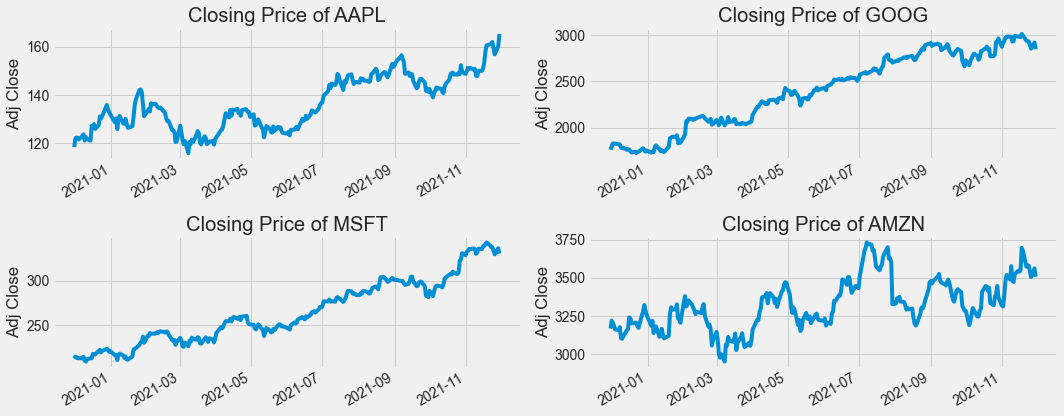

In [14]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

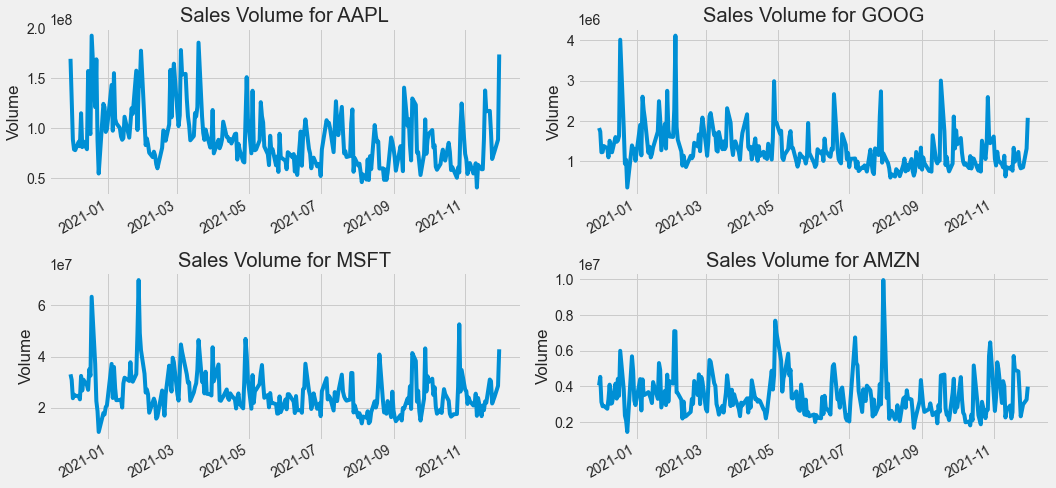

In [15]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Moving average of the various stocks

In [16]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

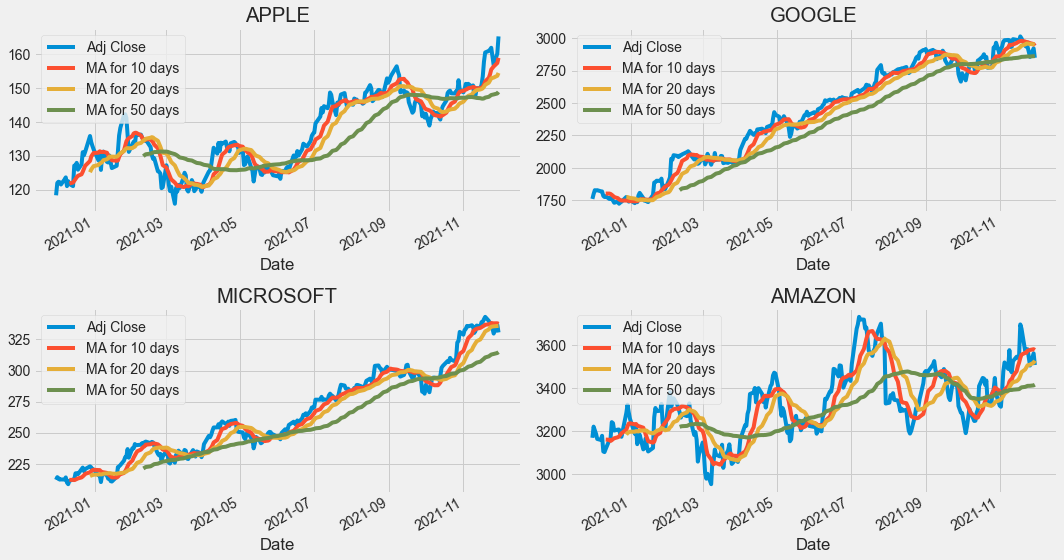

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Daily return of the stock on average

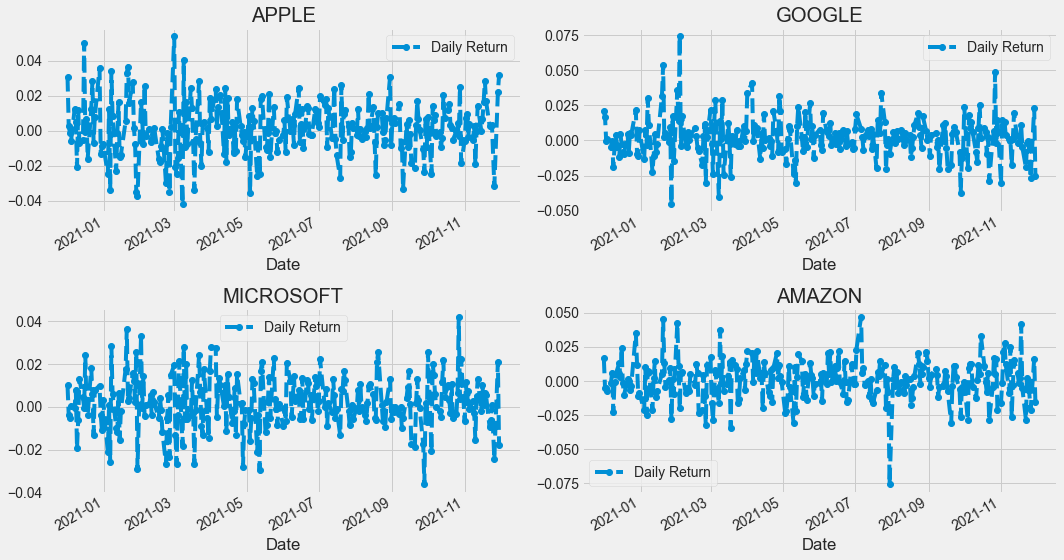

In [18]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

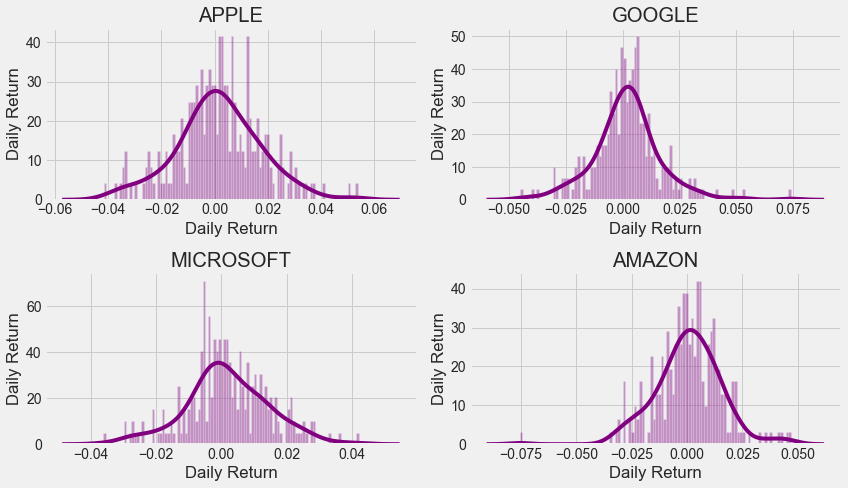

In [19]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

# The correlation between different stocks closing prices

In [20]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-30,118.320587,1760.739990,212.290543,3168.040039
2020-12-01,121.968102,1798.099976,214.412735,3220.080078
2020-12-02,122.325890,1827.949951,213.579697,3203.530029
2020-12-03,122.186752,1826.770020,212.459106,3186.729980
2020-12-04,121.500969,1827.989990,212.578110,3162.580078


In [21]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-30,NaN,NaN,NaN,NaN
2020-12-01,0.030827,0.021218,0.009997,0.016427
2020-12-02,0.002933,0.016601,-0.003885,-0.005140
2020-12-03,-0.001137,-0.000645,-0.005247,-0.005244
2020-12-04,-0.005613,0.000668,0.000560,-0.007578


C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


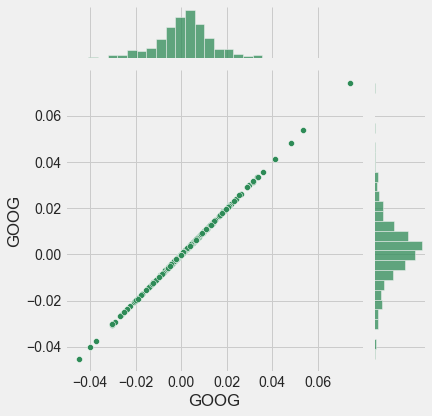

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


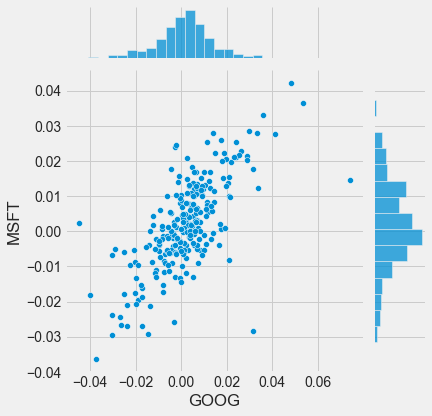

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

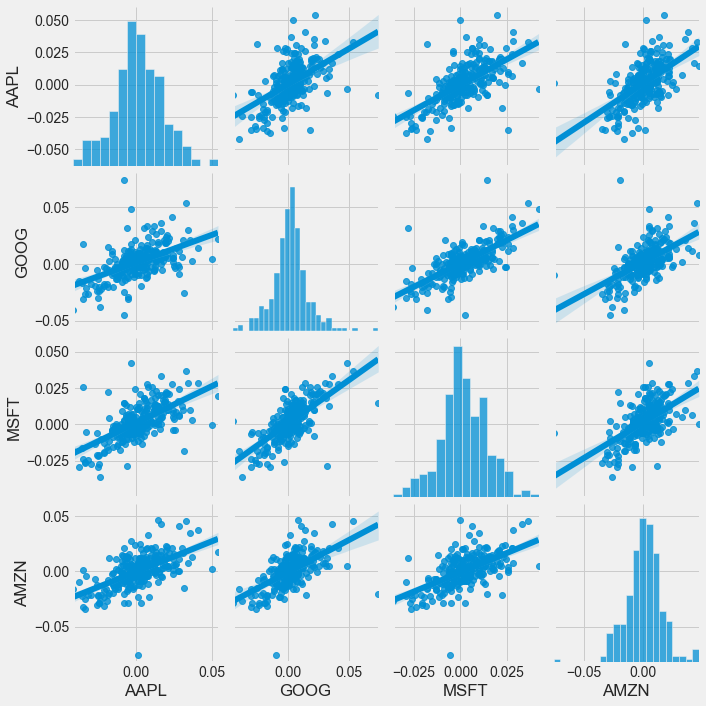

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

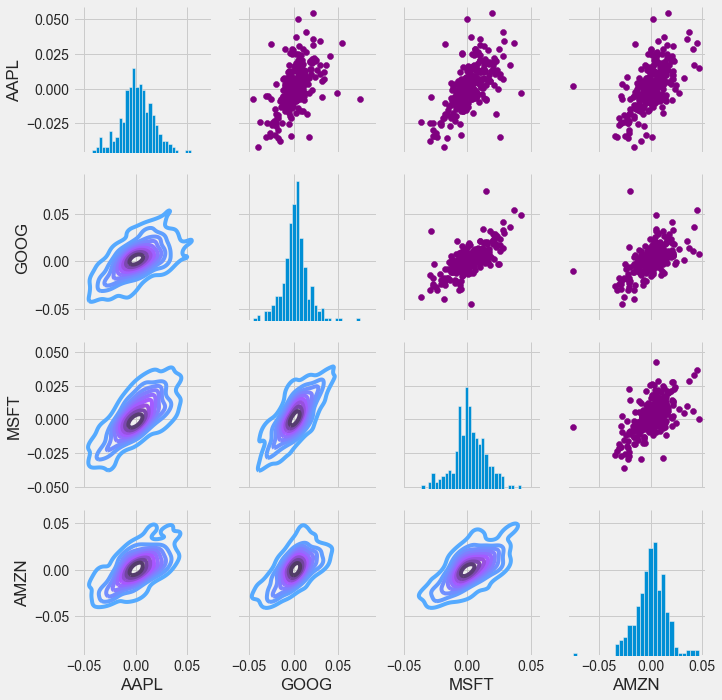

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

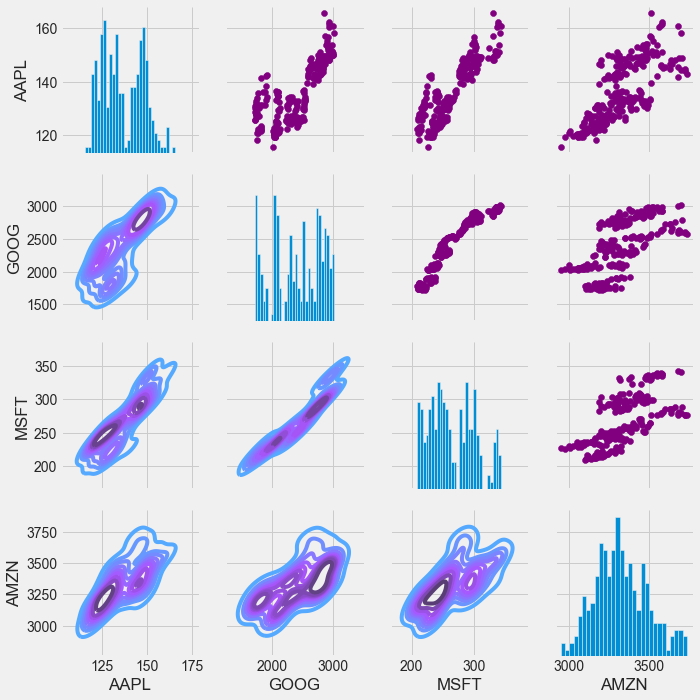

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

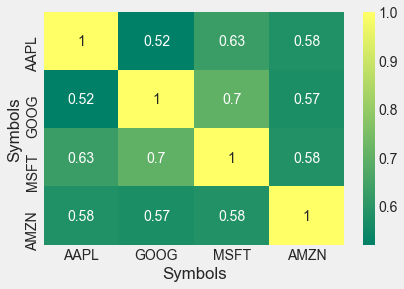

In [27]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

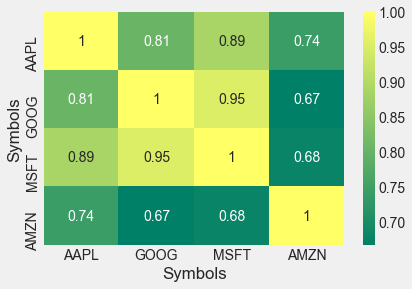

In [28]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# How much value do we put at risk by investing in a particular stock?

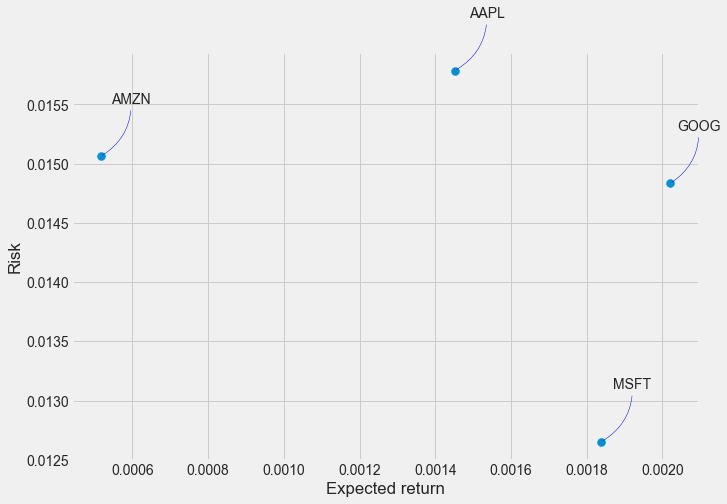

In [29]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the closing price stock price of APPLE inc

In [30]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591940
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659609
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800157
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933965
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913450
...,...,...,...,...,...,...
2021-11-23,161.800003,159.059998,161.119995,161.410004,96041900.0,161.410004
2021-11-24,162.139999,159.639999,160.750000,161.940002,69463600.0,161.940002
2021-11-26,160.449997,156.360001,159.570007,156.809998,76959800.0,156.809998


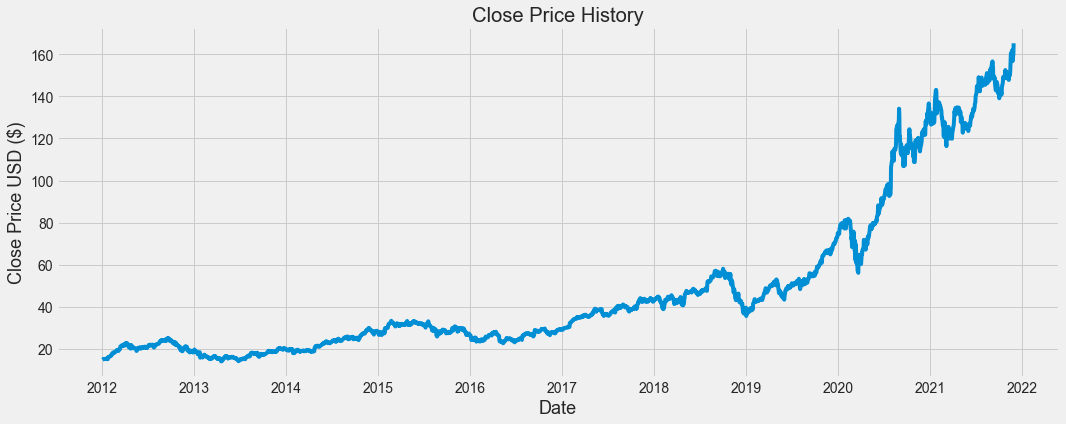

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [32]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2371

In [33]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00488453],
       [0.00540601],
       [0.00648911],
       ...,
       [0.94390575],
       [0.96656813],
       [1.        ]])

In [34]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00488453, 0.00540601, 0.00648911, 0.00752029, 0.00736219,
       0.0077185 , 0.00755568, 0.00728196, 0.00690913, 0.00806301,
       0.00910363, 0.00878271, 0.00702475, 0.00870248, 0.00705071,
       0.01324486, 0.01276585, 0.01339116, 0.01474325, 0.01556206,
       0.01549363, 0.01524115, 0.01631716, 0.01732945, 0.01847626,
       0.02032861, 0.02421971, 0.0242787 , 0.02644489, 0.02806362,
       0.02528157, 0.02635286, 0.02633162, 0.02933549, 0.02890839,
       0.02969887, 0.0311194 , 0.0319099 , 0.03418699, 0.03584583,
       0.03632484, 0.03649239, 0.03365606, 0.03297175, 0.03307322,
       0.03573966, 0.03649003, 0.03810169, 0.04190076, 0.04696935,
       0.04602076, 0.04602311, 0.0496877 , 0.05083451, 0.05001805,
       0.0492724 , 0.04849606, 0.05107518, 0.05284495, 0.05358588])]
[0.051754768900778306]

[array([0.00488453, 0.00540601, 0.00648911, 0.00752029, 0.00736219,
       0.0077185 , 0.00755568, 0.00728196, 0.00690913, 0.00806301,
       0.00910363, 0.00878271, 0.0

# Model Building

In [36]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [39]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [40]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=1)

2311/2311 [==============================] - 87s 35ms/step - loss: 0.0012 - accuracy: 4.3271e-04


In [41]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

11.211742206081862

C:\Users\DEVMAL~1\AppData\Local\Temp/ipykernel_7388/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


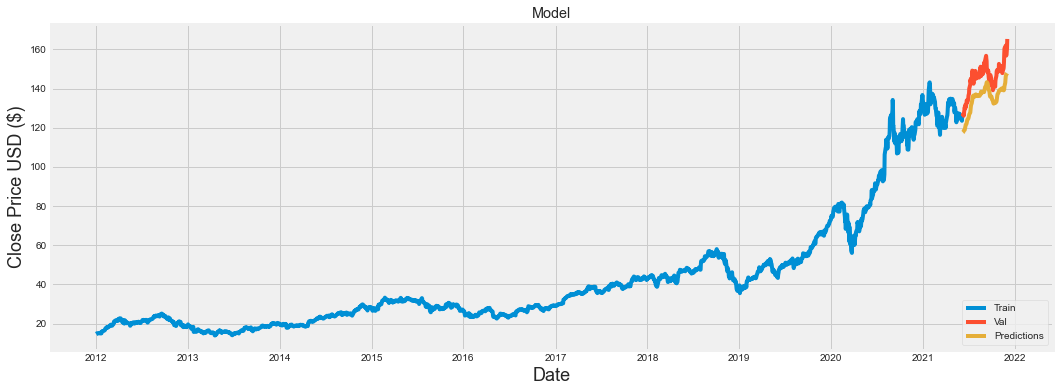

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-06-07,125.900002,117.580826
2021-06-08,126.739998,117.696625
2021-06-09,127.129997,117.984787
2021-06-10,126.110001,118.359123
2021-06-11,127.349998,118.575150
...,...,...
2021-11-23,161.410004,144.637009
2021-11-24,161.940002,146.132278
2021-11-26,156.809998,147.350571
